# Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Reading the Dataset using Pandas

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Performing Exploratory Data Analysis

In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Removing non-relevant columns from the dataset

As seen above, the dataset has a total of 13 columns, out of which the following seem to not contribute to the rating in any possible manner from an initial scan: 

- App
- Size 
- Genres
- Last Updated
- Current Ver
- Android Ver

In [5]:
df_updated = df.drop(['App','Size','Genres','Last Updated','Current Ver','Android Ver','Installs'],axis=1)

In [6]:
df_updated.head()

,Category,Rating,Reviews,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,Free,0,Everyone
1,ART_AND_DESIGN,3.9,967,Free,0,Everyone
2,ART_AND_DESIGN,4.7,87510,Free,0,Everyone
3,ART_AND_DESIGN,4.5,215644,Free,0,Teen
4,ART_AND_DESIGN,4.3,967,Free,0,Everyone


Now that we have removed the uncessary columns, we beginto preprocess the data. This will be done in the following steps : 

1. Convert the Category into six major classes :  LIFESTYLE, FAMILY, TRAVEL, ENTERTAINMENT, HOME AND DECOR, EDUCATION AND BUSINESS and encode them as 0 , 1, 2, 3, 4, and 5 respectively

The subclasses of each of these major classes are : 
- 1. LIFESTYLE : 
      - Beauty
      - Dating
      - Social
      - Lifestyle
      - Personalization
      - Communication
      - Health_And_Fitness

   2. FAMILY:
      - Family
      - Medical
      - Shopping
      - Parenting
      - Finance
      - Tools


   3. TRAVEL:
      - Travel_and_local
      - Auto_and_vehicles
      - Maps_and_Navigation
      - Photography
      - Weather

   4. ENTERTAINMENT:
      - Entertainment
      - News_and_magazines
      - Video_players
      - Events
      - Food_and_Drink
      - Game
      - Sports

   5. HOME AND DECOR:
      - Art_and_design
      - House_and_home

   6. EDUCATION AND BUSINESS:
      - Education
      - Libraries_and_demo
      - Books_and_reference
      - Business
      - Comics
      - Productivity


2. Convert the reviews column into a numerical column

3. Encode the Type as : 
   - Free : 0
   - Paid : 1

4. Encode the Content Ratings columns as : 
   - Everyone : 0
   - Teen : 1
   - Everyone 18+ : 2
   - Mature 17+ : 3
   - Adults only 18+ : 4
   
   Since the values with the content rating as unrated and nan are only 2 values and 1 value respectively, we will ignore these values.


5. Convert the price column into numerical values by removing the dollar symbols from the strings.
6. Finally, we will normalize the values in the reviews and price column and move on to the model creation steps. 

In [7]:
def clubCategory(value)->int:
    if value in ['BEAUTY','DATING','SOCIAL','LIFESTYLE','PERSONALIZATION','COMMUNICATION','HEALTH_AND_FITNESS'] :
        return 0
    elif value in  ['FAMILY','MEDICAL','SHOPPING','PARENTING','FINANCE','TOOLS'] :
        return 1
    elif value in ['TRAVEL_AND_LOCAL','AUTO_AND_VEHICLES','MAP_AND_NAVIGATION','PHOTOGRAPHY','WEATHER'] : 
        return 2
    elif value in ['ENTERTAINMENT','NEWS_AND_MAGAZINES','VIDEO_PLAYERS','EVENTS','FOOD_AND_DRINK','GAME','SPORTS'] : 
        return 3
    elif value in ['ART_AND_DESIGN','HOUSE_AND_HOME'] : 
        return 4
    elif value in ['EDUCATION','LIBRARIES_AND_DEMO','BOOKS_AND_REFERENCE','BUSINESS','COMICS','PRODUCTIVITY'] : 
        return 5
    else:
        return None

In [8]:
df_updated['Category'] = df_updated['Category'].apply(clubCategory)
df_updated.dropna(subset=['Category'],inplace=True)

In [9]:
df_updated.tail()

,Category,Rating,Reviews,Type,Price,Content Rating
10836,1.0,4.5,38,Free,0,Everyone
10837,1.0,5.0,4,Free,0,Everyone
10838,1.0,NaN,3,Free,0,Everyone
10839,5.0,4.5,114,Free,0,Mature 17+
10840,0.0,4.5,398307,Free,0,Everyone


In [10]:
df_updated['Reviews'] = df_updated['Reviews'].astype(float)

In [11]:
df_updated.dtypes

Category          float64
Rating            float64
Reviews           float64
Type               object
Price              object
Content Rating     object
dtype: object

In [12]:
df_updated['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [13]:
def encodeTypes(value)->int:
    if(value == 'Free') : 
        return 0
    elif(value == "Paid") : 
        return 1
    else:
        return None
    
df_updated['Type'] = df_updated['Type'].apply(encodeTypes)
df_updated.dropna(subset=['Type'],inplace=True)

In [14]:
df_updated['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [15]:
def encodeContentRating(value)->int : 
    if(value == "Everyone"):
        return 0
    elif(value == "Teen"):
        return 1
    elif(value == "Everyone 10+"):
        return 2
    elif(value == "Mature 17+"):
        return 3
    elif(value=="Adults only 18+"):
        return 4
    else : 
        return None
    

df_updated['Content Rating'] = df_updated['Content Rating'].apply(encodeContentRating)
df_updated.dropna(subset=['Content Rating'],inplace=True)

In [16]:
df_updated['Content Rating'].unique()

array([0., 1., 2., 3., 4.])

In [17]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [18]:
df_updated['Price'] = df_updated['Price'].str.replace('$', '', regex=False)

In [19]:
df_updated['Price'] = pd.to_numeric(df_updated['Price'], errors='coerce')

In [20]:
df_updated.dropna(subset=['Price'], inplace=True)

In [21]:
df_updated.dtypes

Category          float64
Rating            float64
Reviews           float64
Type              float64
Price             float64
Content Rating    float64
dtype: object

Now to make sure that the ratings column (which we are going to predict) does not contain NaN values, we will first check how much data in the column is NaN

In [22]:
df_updated['Rating'].isna().sum().sum()

1459

As we can see, there is a large amount of values in Rating column with NA values. Thus we will have to impute these values with either the mean or median of the values in the Rating Column. Let's check if the Rating column is skewed or not first.

<AxesSubplot: xlabel='Rating', ylabel='Density'>

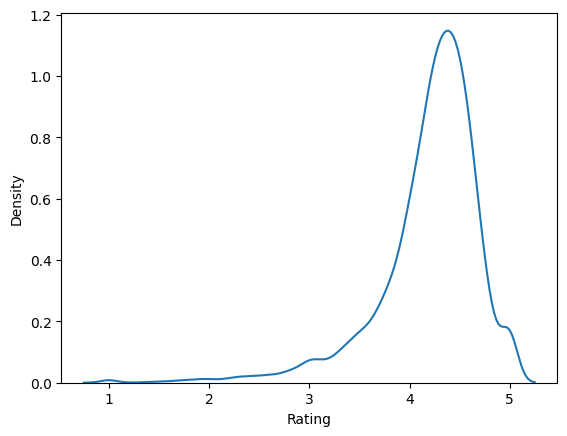

In [23]:
sns.kdeplot(df_updated['Rating'])

As seen from this above graph, the data in the Rating Column is negatively skewed. Thus to impute the values in the column, we should use the median values of the column.

In [24]:
df_updated["Rating"].fillna(df_updated['Rating'].median(),inplace=True)

Now we check if there's any NaN values.

In [25]:
df_updated["Rating"].isna().sum().sum()

0

As seen, there's no NaN values, and now we can move forward to our model creation

## Creating the train-test-splits

In [26]:
from sklearn.model_selection import train_test_split

X = df_updated.drop("Rating",axis=1)
y = df_updated['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10700, dtype: float64

### Normalizing the values in the Price and Reviews column of the training and test data

In [28]:
scaler = StandardScaler()
X_train[['Price','Reviews']] = scaler.fit_transform(X_train[['Price','Reviews']])

X_test[['Price','Reviews']] = scaler.transform(X_test[['Price','Reviews']])

# Model Building

The model which I will be using for this assignment will be RandomForestRegressor model, since it uses Ensemble learning to perform the regression process, making it suitable for this task and a SVM Regressor Model to further help to compare the findings. I will first use a simple Linear Regressor model as a benchmark, and then train the Random Forest Regressor Model to see the differences.


We will assess our models using the Root Mean Squared Logarithmic Error (RMSLE). We use the RMSLE mainly due to two reasons : 
 1. It is robust enough to deal with outliers, which we saw is present in our dataset 
 2. RMSLE incurs a larger penalty for underestimation of the actual value. 

## Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_train,y_train)

LinearRegression()

In [30]:
predictions_linear = linear_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_test,predictions_linear))
print("RMSLE : ",rmsle)

RMSLE :  0.10729781994292013


## RandomForest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=200)

forest_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

Now that the model training is done, we will perform some predictions on our testing set

In [33]:
predictions_forest = forest_model.predict(X_test)

In [34]:
rmsle_forest = np.sqrt(mean_squared_log_error(y_test,predictions_forest))
print("RMSLE : ",rmsle_forest)

RMSLE :  0.11000446262989134


## SVM Regression

In [35]:
from sklearn.svm import SVR
svm_model = SVR(kernel='linear')
svm_model.fit(X_train,y_train)

SVR(kernel='linear')

In [36]:
predictions_svm = svm_model.predict(X_test)

In [37]:
rmsle_svm = np.sqrt(mean_squared_log_error(y_test,predictions_svm))
print("RMSLE : ",rmsle_svm)

RMSLE :  0.11015543753669846


### Comparing the three RMSLE Values

In [38]:
data = {
    'Benchmark Model' : [rmsle],
    'Random Forest Regressor' : [rmsle_forest],
    'SVM Regressor' : [rmsle_svm]
}

result_df = pd.DataFrame(data)
result_df


,Benchmark Model,Random Forest Regressor,SVM Regressor
0,0.107298,0.110004,0.110155


As seen, the benchmark model in general has a better RMSLE value, but among the two models, the Random Forest Regressor had a slight edge above the SVM Regressor.

Now, we will create a very simple application to demonstrate the working of the model, in this case we will be using Streamlit for the frontend, and the Random Forest Regressor for the backend model.

First, we will save this model using the pickle moudle

In [40]:
import pickle
filename = "Forest_Regressor"
pickle.dump(forest_model,open(filename,"wb"))

In [51]:
# Get the feature importances
feature_importances = forest_model.feature_importances_

# Get the corresponding feature names
feature_names = X_train.columns

# Print the feature names and their importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")

Category: 0.14295323692885853
Reviews: 0.7420517921610073
Type: 0.007556988764641788
Price: 0.0465634053298313
Content Rating: 0.060874576815661025
